In [189]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

# Green Parties and the Agenda of Environmental Protection in Europe
The goal of this exploratory data analysis is to understand how green parties have developed in Europe and how their main political domain of environmental awareness emerged in other parties' political program.  **Part A** investigates the success of different Green Parties across Europe and across time and if, when and where environmental issues have found their way into other parties' program. In **Part B**, the Green parties themselves are characterized in relation to other parties and in their alteration over time.

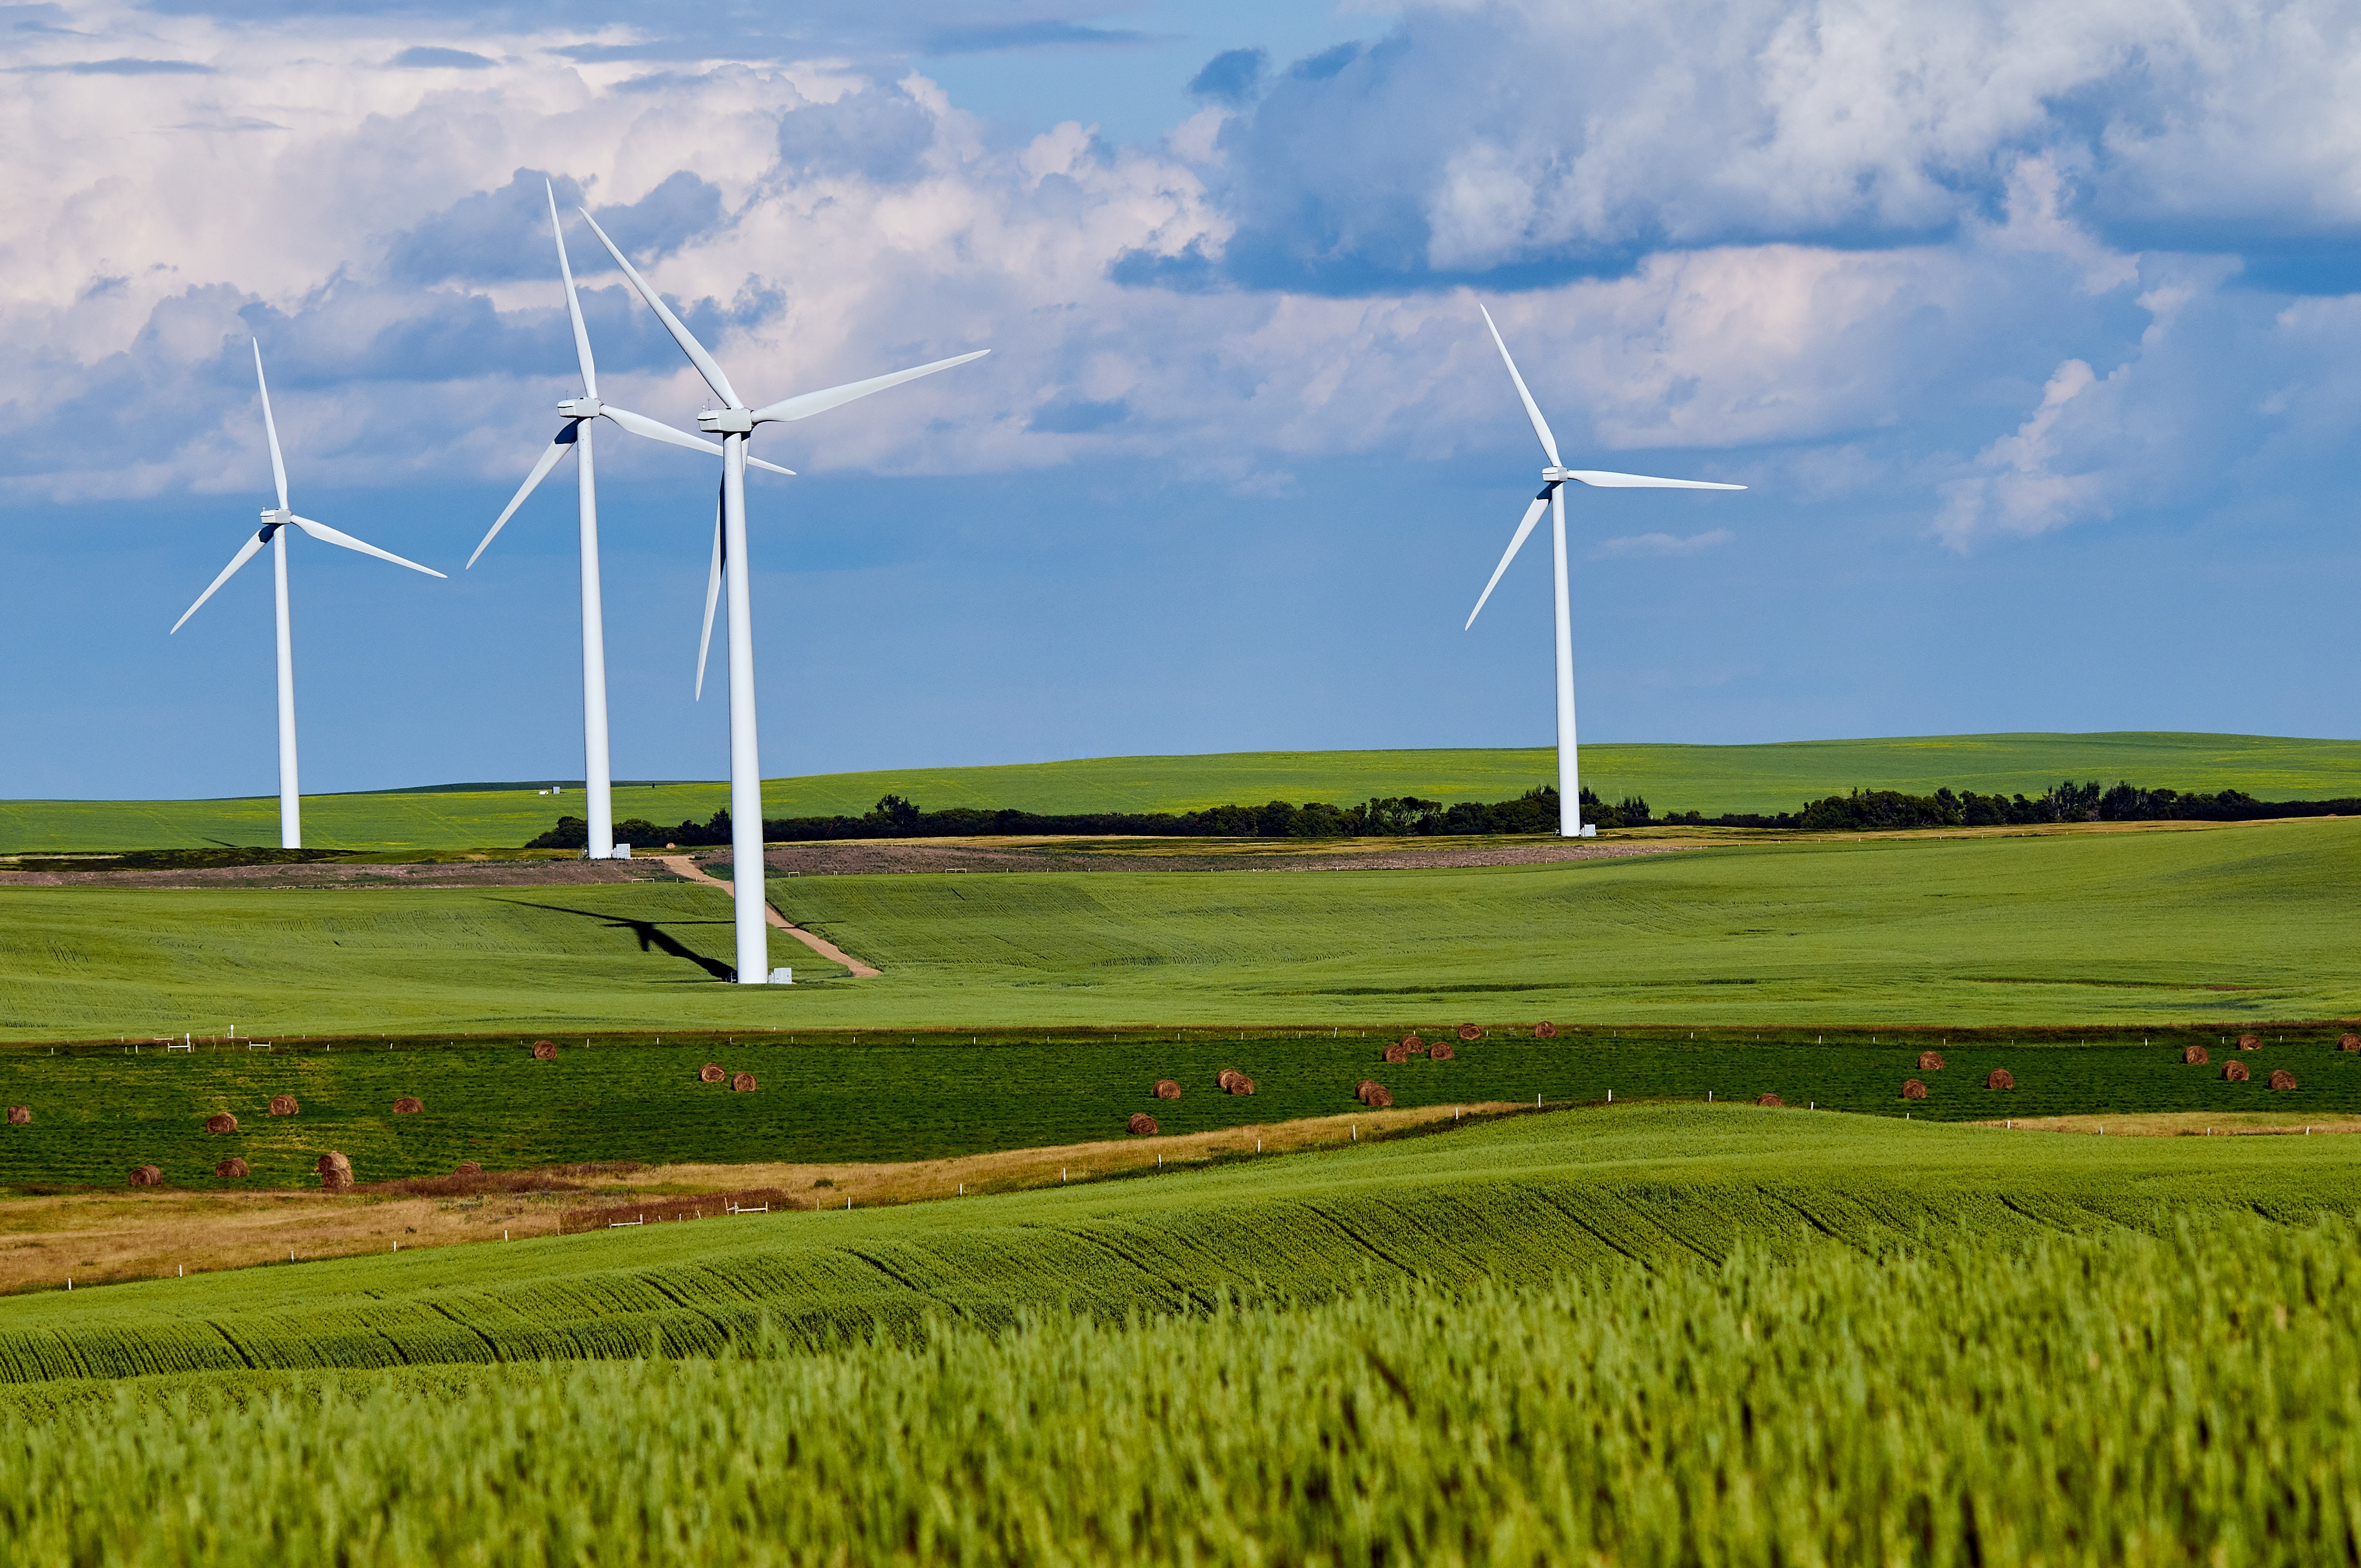

In [188]:
from IPython.display import Image
# Photo by Abby Anaday on Unsplash
Image(filename=r"abby-anaday-1279753-unsplash.png",width=360, height=80)

##  The Dataset 
### The Manifesto Project Dataset
As stated in its documentation, the *Manifesto Project Dataset* was originally created in the late 1970s and the 1980s. The work was continued at the WZB Berlin Social Science Center in the 1990s and 2000s. Since 2009 the Manifesto Research project updates and extends the dataset. It is currently funded by the German Research Foundation (DFG).

In 2003, the project received the American Political Science Association’s (APSA) award for the best dataset in comparative politics. 

### Methodology

Alongside with standard data such as election results and party clusters, the dataset constitutes the relative share of statements for many different categories in relation to all statements in party programs. A “0.35” means that 0.35 percent of the party program was devoted to that category. Since this is a relative share, the scale can run between zero (no statement at all) and 100 (the whole program is about this category). These numbers are hand-coded by researchers.

### Data Reading and Cleaning
More specific data wrangling is done inside of each analysis.

In [91]:
dataset = pd.read_csv("MPDataset_MPDS2018a.csv")
dataset['edate'] =  pd.to_datetime(dataset['edate'], format='%d/%m/%Y')
dataset.head()

country countryname  oecdmember  eumember      edate    date  party  \
0       11      Sweden           0         0 1944-09-17  194409  11220   
1       11      Sweden           0         0 1944-09-17  194409  11320   
2       11      Sweden           0         0 1944-09-17  194409  11420   
3       11      Sweden           0         0 1944-09-17  194409  11620   
4       11      Sweden           0         0 1944-09-17  194409  11810   

                        partyname partyabbrev  parfam   ...     per608_3  \
0       Communist Party of Sweden         SKP      20   ...          NaN   
1  Social Democratic Labour Party         SAP      30   ...          NaN   
2                  People’s Party          FP      40   ...          NaN   
3                     Right Party         NaN      60   ...          NaN   
4                  Agrarian Party         NaN      80   ...          NaN   

   per703_1  per703_2   rile  planeco  markeco  welfare  intpeace  \
0       NaN       NaN   9.60      1.9    1.900      0.0     1.900   
1       NaN       NaN -37.80      3.3    2.200     33.4     5.600   
2       NaN       NaN   9.50      3.2    6.400     14.3     1.600   
3       NaN       NaN  28.00      1.8   22.800     10.6     0.000   
4       NaN       NaN  23.81      0.0   19.048      0.0     4.762   

   datasetversion  id_perm  
0           2018a   JN1LZH  
1           2018a   CMR7F6  
2           2018a   Z6OL6C  
3           2018a   YMKVN2  
4           2018a   U4SCRD  

[5 rows x 174 columns]

## Part A: The Subject of Environmental Protection 
The goal of this section is to examine when and how environmental protection became a political subject of relevance in Europe. Moreover it will be investigated when Green parties appeared in the political arena, how they performed and if this was accompanied by changes in other parties agendas.

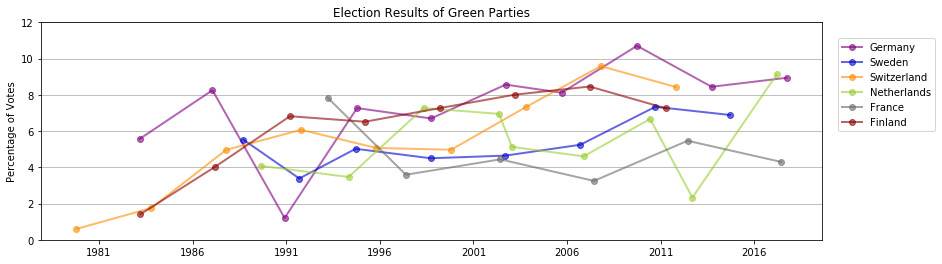

In [5]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 4))
dataset4=dataset[(dataset["date"]>=197000)]
countries=["Germany","Sweden","Switzerland","Netherlands","France","Finland"]
colours4 = ["purple","mediumblue","darkorange","yellowgreen","dimgrey","darkred"]
for i, country in enumerate(countries):
    green = dataset4[(dataset4["parfam"]==10) & (dataset4["countryname"]==country)
                     & (dataset4["partyabbrev"]!="GLP") & (dataset4["partyabbrev"]!="GE")]
    plt.plot(green["edate"],green["pervote"], label=country, alpha=0.6, linewidth=2, marker="o", color=colours4[i])
plt.title("Election Results of Green Parties")
plt.ylim([0,12])
plt.ylabel("Percentage of Votes")
hline_seq = [5,10,15]
plt.grid(axis='y')
plt.legend(loc=(1.02, 0.5));

### 1. Election Results of the Most Successful Green Parties across Europe
As one can see, most Green Parties in these six countries increase their share of votes over time. The highest percentage occurs in Germany in the 2009 elections with around 11%, closely followed by the Swiss Greens in 2007 and the most recent results in the Netherlands. (The relative share of the German Green Parties votes over time is investigated closer in **(2)**.) There is a sharp drop in votes for Germany after the reunification with East Germany in 1989. The dutch curve also fluctuates highly. France is the only country where the most current election results do not belong to one of the most successful results.

Moreover, one can see that the formation of the parties has begun mostly in the 1980s. In **(3)** it will be investigated and visualised when Green Parties have established for all EU countries.

### 2. German's Green Party in Comparison to its Competitors
As mentioned above, the highest share in voters of a Green party in Europe was reached by the German Green Party in 2009 with around 11%. Below their performance over time is plotted.

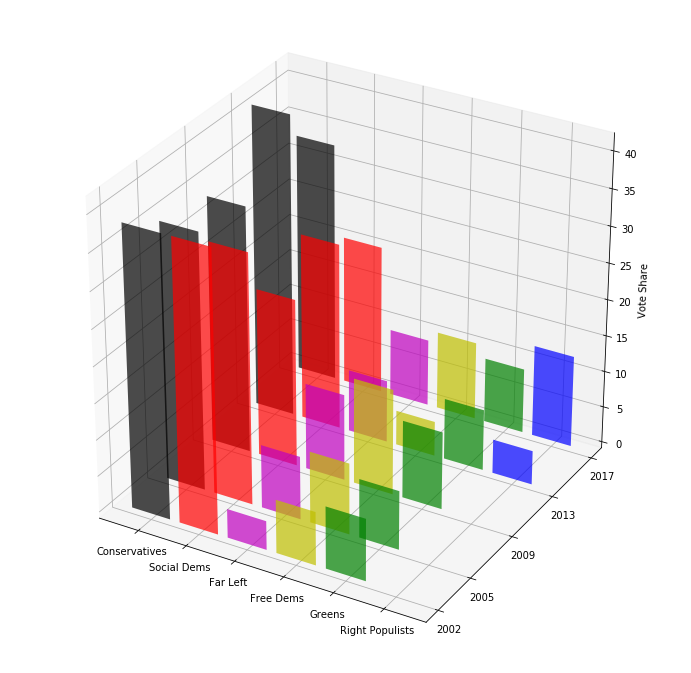

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Data Preparation
germany = dataset[(dataset["countryname"]=="Germany")]

# Plotting
colors = ['black', 'r', 'm', 'y','g', 'blue']
yticks = [2017,2013,2009,2005,2002]
parties = ["Conservatives", "Social Dems", "Far Left", "Free Dems", "Greens", "Right Populists"]
parties_abb = ["CDU/CSU","SPD","LINKE", "FDP", "90/Greens"]
for k in (yticks):
    election = germany[(germany["date"]/100>=k) & (germany["date"]/100<=k+1)]
    ys=[]
    for party in parties_abb:
        if k==2005:
            parties_abb[2]="L-PDS"
        if k==2002 or k==1998:
            parties_abb[2]="PDS"
        party_and_year = election[(election["partyabbrev"]==party)]
        ys.append(party_and_year.iloc[0]["pervote"])
    if k == 2017 or k==2013:
        afd = election[(election["partyabbrev"]=="AfD")]
        ys.append(afd.iloc[0]["pervote"])
    else:
        ys.append(0)
    xs = parties
    ax.bar(xs, ys, zs=k, zdir='y', color=colors, alpha=0.7)
ax.set_zlabel('Vote Share')
ax.set_yticks(yticks)
plt.show()

Above, one can see how the Green Party, although in many positions quite similar to the Social Democrats (SPD) has not lost many votes in the last years, compared to the Social Democrats. In 2009, the Green Party gains their highest share of votes and in 2013, it is noticably stronger than the FPD (yellow). While in 2013 is has around double as many votes as the then-newly established right-populist AfD, in 2017, this reverts and the AfD dominates the Green party significantly.

Furthermore, the Green Party has the lowest fluctuation since 2002 compared to the other parties.

### (3) Rise (and Fall) of the Green Agenda
As mentioned above, part 3 illustrates when Green parties have established in countries of the European Union. Moreover, while investigating this question it is of interest to whether their rise was accompanied by a simultanious increase of environmental awareness in already established parties. To answer this, the occurence of environmental statements of the Green Parties and of conservative parties (as their most prevalent counterpart) is plotted over time.

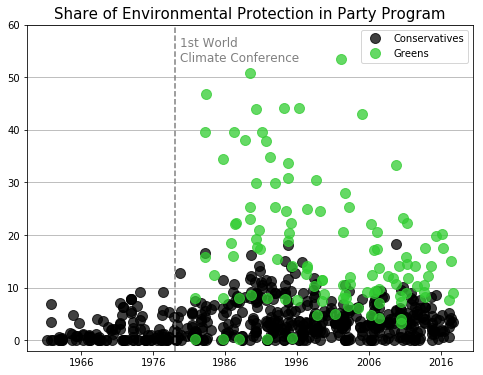

In [190]:
# Evironmental Policy during the years across the political spectrum
# Getting EU members in the dataset
eu_members=dataset[(dataset["eumember"]==10)]
eu_member=eu_members["countryname"]
eu_member=list(set(eu_member))

# Set relevant time scale
dataset5=dataset[(dataset["date"]>196100) & (dataset["countryname"].isin(eu_member)) ]
all_greens=dataset5[(dataset5["parfam"]==10)]
all_cons=dataset5[(dataset5["parfam"].isin([50,60]))]
all_socdems=dataset5[(dataset5["parfam"]==30)]
groups=[all_cons,all_greens]#all_socdems
labels=["Conservatives", "Greens"]
colours=['black','limegreen']#'red'
fig, ax = plt.subplots(figsize=(8, 6))
for colour,group,label in zip(colours,groups, labels):
    plt.plot(group["edate"],group["per501"], color=colour, linestyle="None", 
             marker="o", alpha=0.75, markersize=10, label=label)
plt.grid(axis='y')
plt.axvline(dt.datetime(1979, 2, 1), color="grey",linestyle="--")
plt.ylim([-2,60])
plt.annotate("1st World \nClimate Conference", xy=(dt.datetime(1979, 9, 26),53), color="grey", size=12)
plt.title("Share of Environmental Protection in Party Program", size=15)
plt.legend(loc=1);

This quote from the New York Times Article __[*Losing Earth: The Decade We
Almost Stopped Climate Change*](https://www.nytimes.com/interactive/2018/08/01/magazine/climate-change-losing-earth.html)__ sheds light on the observation very adequately.
>>Nearly everything we understand about global warming was understood in 1979. By that year, data collected since 1957 confirmed what had been known since before the turn of the 20th century: Human beings have altered Earth’s atmosphere through the indiscriminate burning of fossil fuels. The main scientific questions were settled beyond debate, **and as the 1980s began, attention turned from diagnosis of the problem to refinement of the predicted consequences**. 

In the next visualisation, the same trend is shown for the Social Demacratic Parties of five exemplary countries.

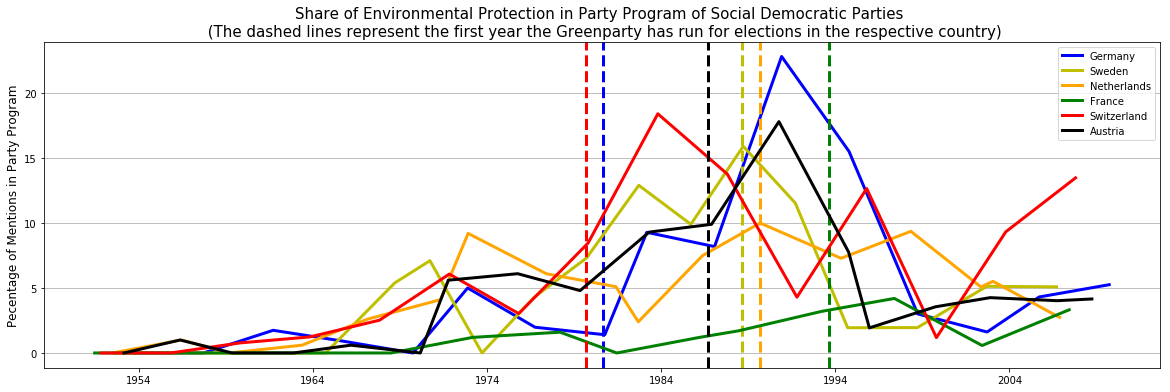

In [97]:
dataset["environment"]=dataset["per501"]
# setting the time span
datasetf=dataset[(dataset["date"]>195000) & (dataset["date"]<201000)]
fig, ax = plt.subplots(figsize=(20, 6))
# using examplatory countries with relevant Green parties
countries=["Germany","Sweden",'Netherlands',"France","Switzerland","Austria"]
colours=["b","y","orange","green","red","black"]
# These are the years where the Green Party first run for elections
first_green=[1980,1988,1989,1993,1979,1986]
for country,first_time, color in zip(countries,first_green, colours):
    socdem = datasetf[(datasetf["parfam"]==30) & (datasetf["countryname"]==country) 
                     &(datasetf["partyabbrev"]!="LdU/AdI")&(datasetf["partyabbrev"]!="PPR")]
    plt.plot(socdem["edate"],socdem["environment"], label=country,color=color, 
             linewidth=3)
    plt.axvline(dt.datetime(first_time, 9, 1), color=color,linestyle="--", linewidth=3)
plt.title("Share of Environmental Protection in Party Program of \
Social Democratic Parties \n (The dashed lines represent the first year the Green\
party has run for elections in the respective country)", fontsize=15)
plt.ylabel("Pecentage of Mentions in Party Program", fontsize=12)
plt.grid(axis='y')
plt.legend();

The above graph shows that in most cases the rise of the awareness of environmental issues (as measured with the Social Democratic Agendas) had started before Green parties have established themselves. In the Netherlands and in Sweden, the first run in elections of their Green Party collides with the all-time high in the Social Democrats' Environmental Focus. For all other displayed countries, the first run of their Green Party is during a period of increased awareness.

It should be noted that the overall trend has its peak in the late 80s and early 90s. The current values are noticably lower than in that time period and seem to stay at the level of the mid 70s. They are nevertheless higher than in the 50s, 60s. This pattern is especially well visible for Germany, Austria and Sweden.

### 4. Countries' Green Profiles
In this section the objective are differences between countries regarding their environmental stance.

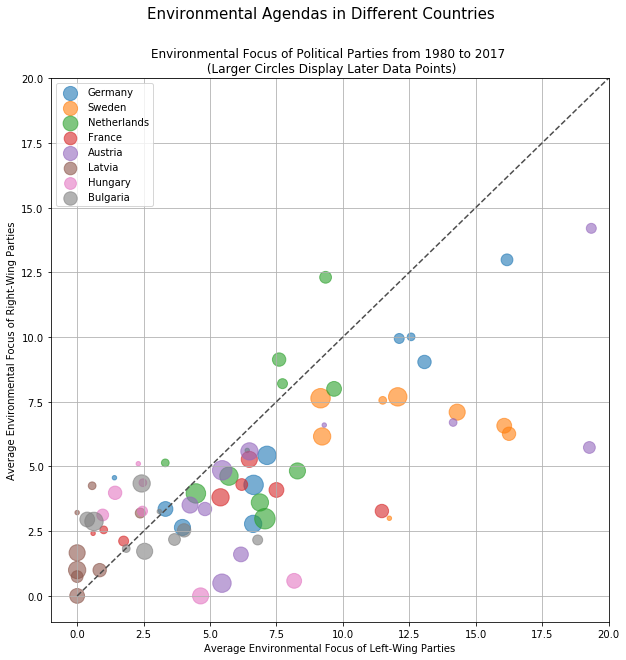

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
# Example of both Eastern and Western European Countries
countries=["Germany","Sweden","Netherlands","France",
           "Austria", "Latvia", "Hungary","Bulgaria"]
# Using party family membership to cluster and select for right-wing and left-wing parties
dataset["rightwing"]=dataset["parfam"].isin([40,50,60])
dataset["leftwing"]=dataset["parfam"].isin([30,10,20])
for country in countries:
    results_left=[]
    results_right=[]
    for year1 in range(1980,2017):
        dt_country = dataset[(dataset["countryname"]==country) & (dataset["date"]/100>=year1) & (dataset["date"]/100<=year1+1)]
        if len(dt_country) != 0:
            # Calculating the average of environmental protection mentions for the two groups for each country and year
            average_right = dt_country.groupby(['rightwing']).mean()["per501"]
            average_left = dt_country.groupby(['leftwing']).mean()["per501"]
            results_left.append(average_left[1])
            results_right.append(average_right[1])
    if (len(average_left)!=0) & (len(average_right)!=0):
        s = [40*n+20 for n in range(len(results_left))]
        plt.scatter(results_left,results_right, label=country,s=s, alpha=0.6)
ax.plot([0, 25], [0, 25], ls="--", c=".3")
plt.title("Environmental Focus of Political Parties from 1980 to 2017 \n (Larger Circles Display Later Data Points)")
plt.xlabel("Average Environmental Focus of Left-Wing Parties")
plt.ylabel("Average Environmental Focus of Right-Wing Parties")
plt.suptitle("Environmental Agendas in Different Countries", size=15, ha="center")
plt.ylim([-1,20])
plt.xlim([-1,20])
plt.grid()
plt.legend();

##### Distinctions between countries
The above plot illustrates different characteristics between former Eastern bloc states and Western European countries. Latvia (brown), Hungary (pink) and Bulgaria (grey) as examples of former Soviet countries display very low environmental mentions both in their right-wing and left-wing parties, even in more recent elections. France used to fall into same area (smaller red circles) but has shifted more towards the upper right (larger red circles). The Netherlands, Germany and Sweden show higher frequencies of environmental protection mentions in their parties' political programs.
##### Overall Pattern
Regarding the focus on the environment for different countries in different years, one can see that most data points lie in the lower right triangle. This means that left-wing parties mentions environmental protection more dominantly than right-wing parties.

Nevertheless, there is a visible positive correlation between the intensity of environmental protection mentions of left and right parties for elections. Sweden is an exeption to this overall pattern: Their right-wing parties stay constant irregardless of their left-wing parties increasing their environmental focus or not.

# Part B: Characterising Green Parties besides Environmental Protection
In this section, the political orientation of Green parties is analysed and compared to the main competitors, conservatives and social democrats. In **part (1)**,  __[the orientation along cultural and econimical axes](https://link.springer.com/content/pdf/10.1057%2Fcep.2011.1.pdf?fbclid=IwAR3-ozdwKUMgh6FNwHoZR1GQrUGUhMj4lbbU58OSIKRwSQAiF-Ylw98Gyvcare)__ are analysed for the examples of Germany and Austria. In **part (2)** the stance towards **Economic Growth** is visualised for all EU members. And lastly, in **part (3)**, the stance towards **Traditional Morality** is looked at, again for all EU members.

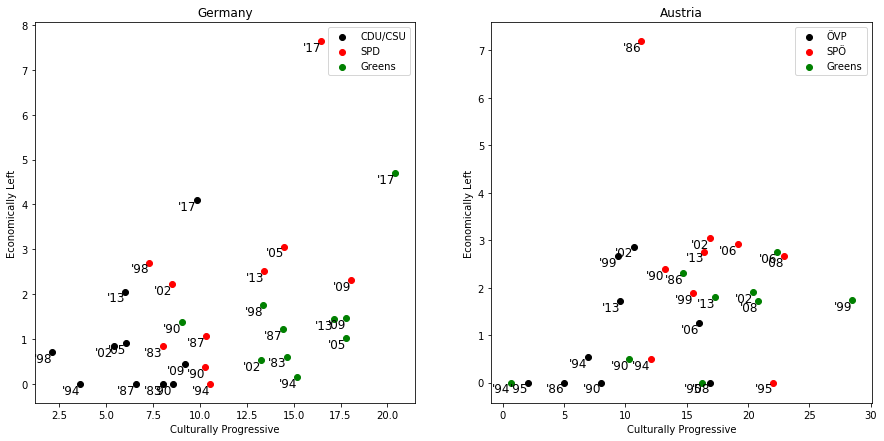

In [138]:
fig, ax= plt.subplots(1,2,figsize=(15,7))

# The definitions here are taken from 
# "Ideological convergence within party families across Europe, 1945–2009", Camia V., Caramani D. (2012)
# (see link above)

# Creates a variable for being culturally progressive
dataset["Culturally_Progressive"] = dataset["per103"] + dataset["per107"] + dataset["per503"] + dataset["per602"] + dataset["per604"]
+ dataset["per607"] - dataset["per109"] - dataset["per305"] - dataset["per601"]
- dataset["per603"] - dataset["per605"] - dataset["per608"]

# Creates a variable for being economically left
dataset["Economically_Left"] = dataset["per404"] + dataset["per405"] + dataset["per409"] + dataset["per412"] + dataset["per413"]
+ dataset["per415"] + dataset["per504"] + dataset["per701"] - dataset["per401"] - dataset["per402"]
- dataset["per414"] - dataset["per505"] - dataset["per702"] - dataset["per704"]

# Get German Conservatives, Social Dems and Greens
germany = dataset[(dataset["countryname"]=="Germany")]
germany = germany[(germany["date"]>=198200)]
green_german = germany[(germany["parfam"]==10)]
cdu_german = germany[(germany["partyabbrev"]=="CDU/CSU")]
spd_german = germany[(germany["parfam"]==30)]

# Get Austrias Conservatives, Social Dems and Greens
austria = dataset[(dataset["countryname"]=="Austria")]
austria = austria[(austria["date"]>=198600)]
green_austria = austria[(austria["parfam"]==10)]
cdu_austria = austria[(austria["partyabbrev"]=="ÖVP")]
spd_austria = austria[(austria["partyname"]=="Austrian Social Democratic Party")]

# Plot Characteristics for all three parties and each election year
ax[0].set_xlabel("Culturally Progressive")
ax[0].set_ylabel("Economically Left")
text_year=["'83","'87","'90","'94","'98","'02", "'05", "'09", "'13", "'17"]
ax[0].scatter(cdu_german["Culturally_Progressive"],cdu_german["Economically_Left"],c="black", label="CDU/CSU")
ax[0].scatter(spd_german["Culturally_Progressive"],spd_german["Economically_Left"],c="red", label="SPD")
ax[0].scatter(green_german["Culturally_Progressive"],green_german["Economically_Left"], c="green", label="Greens")
ax[0].set_title("Germany")
for i in range(10):
    ax[0].annotate(text_year[i], (cdu_german.iloc[i]["Culturally_Progressive"],cdu_german.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
for i in range(10):
    ax[0].annotate(text_year[i], (spd_german.iloc[i]["Culturally_Progressive"],spd_german.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
for i in range(10):
    ax[0].annotate(text_year[i], (green_german.iloc[i]["Culturally_Progressive"],green_german.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
ax[0].legend(loc="upper right")  
#
ax[1].set_xlabel("Culturally Progressive")
ax[1].set_ylabel("Economically Left")
text_year2=["'86","'90","'94","'95","'99", "'02", "'06", "'08", "'13"]
ax[1].scatter(cdu_austria["Culturally_Progressive"],cdu_austria["Economically_Left"],c="black",label="ÖVP")
ax[1].scatter(spd_austria["Culturally_Progressive"],spd_austria["Economically_Left"],c="red", label="SPÖ")
ax[1].scatter(green_austria["Culturally_Progressive"],green_austria["Economically_Left"], c="g",label="Greens")
ax[1].set_title("Austria")
for i in range(len(text_year2)):
    ax[1].annotate(text_year2[i], (cdu_austria.iloc[i]["Culturally_Progressive"],cdu_austria.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
for i in range(len(text_year2)):
    ax[1].annotate(text_year2[i], (spd_austria.iloc[i]["Culturally_Progressive"],spd_austria.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
for i in range(len(text_year2)):
    ax[1].annotate(text_year2[i], (green_austria.iloc[i]["Culturally_Progressive"],green_austria.iloc[i]["Economically_Left"]), 
                   fontsize=12,horizontalalignment='right', verticalalignment='top')
ax[1].legend(loc="upper right");

### 1. A Niche to Fill: Political Positioning of Green Parties
In the above scatter plots, it is visible that for Germany and Austria the Green parties tend to be culturally more progressive than both the Conservatives and the Social Democrats. This is an overall pattern, but during the years there are exceptions. For example, both in 2009 in Germany and in 2008 in Austria the Social Democratic Parties are culturally slightly more progressive according to the axis used. On average, the Green parties political program displayed economically more left views than those of conservative programs but righter views than the social democratic parties.

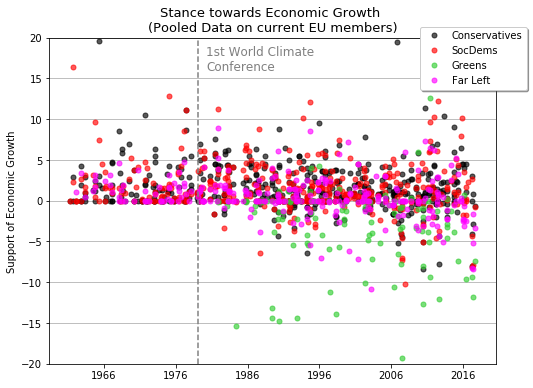

In [185]:
# Economic Growth during the years across the political spectrum
dataset5=dataset[(dataset["date"]>196100) & (dataset["countryname"].isin(eu_member)) ]
all_greens=dataset5[(dataset5["parfam"]==10)]
all_cons=dataset5[(dataset5["parfam"].isin([50,60]))]
all_socdems=dataset5[(dataset5["parfam"]==30)]
all_left=dataset5[(dataset5["parfam"]==20)]
groups=[all_cons,all_socdems,all_greens, all_left]#all_socdems
labels=["Conservatives","SocDems", "Greens", "Far Left"]
colours=['black','red','limegreen', 'magenta']#'red'
fig, ax = plt.subplots(figsize=(8, 6))
for colour,group,label in zip(colours,groups, labels):
    plt.plot(group["edate"],group["per410"]-group["per416"], color=colour, linestyle="None", 
             marker="o", alpha=0.65, markersize=5, label=label)
plt.axvline(dt.datetime(1979, 2, 1), color="grey",linestyle="--")
plt.annotate("1st World Climate \nConference", xy=(dt.datetime(1980, 4, 1),16), color="grey", size=12)
plt.ylim([-20,20])
plt.grid(axis='y')
plt.ylabel("Support of Economic Growth")
plt.title("Stance towards Economic Growth \n(Pooled Data on current EU members)", size=13)
plt.legend(loc=(0.83,0.84),shadow=True);

### 2. The Growth of the Anti-Growth Movement
It is remarkable to see how up until the 1980s not a single conservative (black), social democratic (red) or even far-left (magenta) party held an anti-growth view. Since than, many Green parties have joined the political sphere and in the majority of elections favourably mention anti-growth politics. These views include the *rejection of the idea that
all growth is good growth, the opposition to growth that causes environmental or societal harm and the call for sustainable economic development*, as stated in the __[Manifesto Data Codebook](https://manifesto-project.wzb.eu/down/data/2018a/codebooks/codebook_MPDataset_MPDS2018a.pdf)__. Interestingly, since then, also some other parties fall into the negative side of this axis: economical growth is seen more critically outside green parties as well.


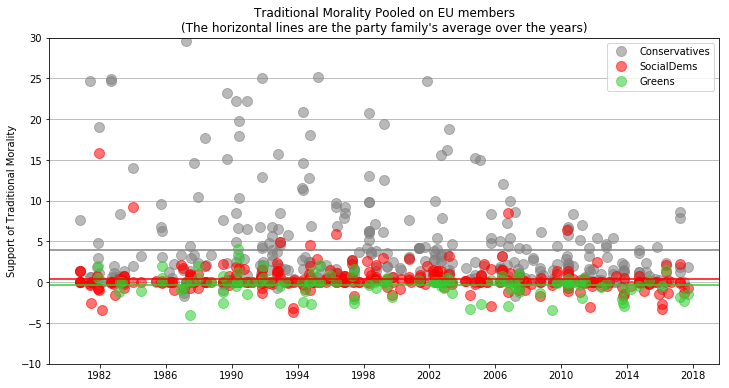

In [157]:
# Traditional Morality during the years across the political spectrum
dataset5=dataset[(dataset["date"]>198000) & (dataset["countryname"].isin(eu_member)) ]
all_greens=dataset5[(dataset5["parfam"]==10)]
all_cons=dataset5[(dataset5["parfam"].isin([50,60]))]
all_socdems=dataset5[(dataset5["parfam"]==30)]
groups=[all_cons,all_socdems, all_greens]#,all_socdems,all_cons]#
colours=["grey","red", 'limegreen']#,'red','black']#'red'
labels=["Conservatives","SocialDems","Greens"]
fig, ax = plt.subplots(figsize=(12, 6))
for colour,group, label in zip(colours,groups, labels):
    plt.plot(group["edate"],group["per603"]-group["per604"], color=colour, 
             linestyle="None", marker="o", alpha=0.55, markersize=10, label=label)
for colour,group in zip(colours,groups):
    plt.axhline(np.mean(group["per603"]-group["per604"]), color=colour)
plt.grid(axis='y')
plt.ylim([-10,30])
plt.ylabel("Support of Traditional Morality")
plt.legend()
plt.title("Traditional Morality Pooled on EU members\n(The horizontal lines are the party family's average over the years)");

### 3. Environmentalist Hippies? Opposition to Traditional Values 
Compared to Conservative Parties, the Green parties show a clearly lower level of positive mentions of traditional morality in their party program. While Social Democrats across EU members and across time show a slightly positive stance towards this issue the overall average for Green parties is slightly negative. Overall, the negative stance towards traditional morality is not as distinct as the positive stance. Conservative parties, many times, filled their party program with over 10% content on support for traditional morality, whereas there are no values lower than -5 (meaning 5% mentions agains traditional morality) in this plot.


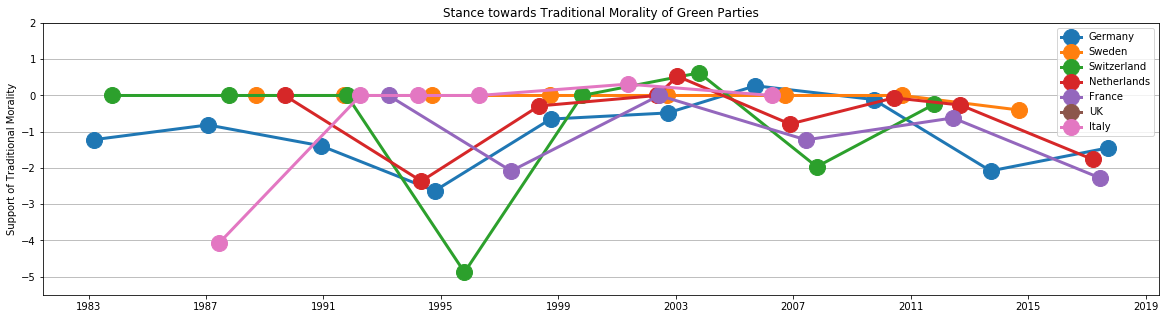

In [184]:
fig, ax = plt.subplots(figsize=(20, 5))
countries=["Germany","Sweden","Switzerland","Netherlands","France", "UK", "Italy"]
greens3=dataset[(dataset["parfam"]==10) & (greens3["date"]>198000)]
for country in countries:
    greens = greens3[(greens3["countryname"]==country) & (greens3["partyabbrev"]!="GLP")
                    & (greens3["partyabbrev"]!="GE")]
    plt.plot(greens["edate"],greens["per603"]-greens["per604"], label=country, 
             linewidth=3, marker="o", markersize=16)
plt.title("Stance towards Traditional Morality of Green Parties")
plt.grid(axis='y')
plt.ylim([-5.5,2])
plt.ylabel("Support of Traditional Morality")
plt.legend();

Broken down to the countries with significant Green parties, one can observe that the extreme oppositions towards traditional morality with values of -2 to -5 occured in the 90s and have mostly levelled out between 0 and -2 in the last two decades.

### Summary and Lookout
#### The Subject of Environmental Protection
In the most recent polls, the Green Party in Germany has overtaken the Social Democrats with poll ratings of around 20%. Given they keep up this result until elections, they were to become the second strongest party in the largest populated country of the EU. This might be a jump in an overall trend of increasing votes (**part A (1)**), although quite unexpected and a premiere regarding past German election results (**part A (2)**). Given the low environmental agenda in former East block countries (**part A (4)**), it remains unknown if this will change in the coming years either by a rise of successful Green parties or by the intake of environmental considerations by mainstream parties. Successful Green Parties in Europe have established themselves mostly in the 80s (**part A (3)**): a time period with a generally high awareness of environmetal issues, expressing itself in the rise of these issues in other party programs as well. Nevertheless, since then, this awareness has dropped, measured by the proportion of sentences in party programs.
#### Characterising Green Parties
In the case studies of Germany and Austria, one could see how Green parties were economically more left than the Conservatives and culturally even more progressive than Social Democrats (**part B (1)**). Zooming into an interesting aspect of economical positioning, it became visible how the Green parties distinct themselves by being the first and strongest opposition of undifferentiated economic growth (**part B (2)**). This trend has continued until now. In comparison, the strong opposition towards traditional norms has declined in the last decades (**part B (3)**) for major Green parties in the EU. Nevertheless, they are still less supportive of traditional values as their socialdemocratic counterparts. Overall, one could describe Green parties by their focus on environmental issues, their refusal of undifferentiated economic growth and a cultural progressive stance.